In [2]:
# import thư viện và công cụ cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [3]:
df= pd.read_csv('../kidney_disease.csv')

In [4]:
# Tạo từ điển ánh xạ cột tiếng Anh → tiếng Việt +
col_map = {
    'age': 'Tuổi',
    'bp': 'Huyết Áp',
    'sg': 'Tỷ trọng nước tiểu',
    'al': 'Hàm lượng albumin trong nước tiểu',
    'su': 'Mức đường trong nước tiểu',
    'rbc': 'Tình trạng hồng cầu',
    'pc': 'Tình trạng bạch cầu mủ',
    'pcc': 'Cụm bạch cầu mủ',
    'ba': 'Vi khuẩn trong nước tiểu',
    'bgr': 'Đường huyết ngẫu nhiên',
    'bu': 'Ure máu',
    'sc': 'Creatinine huyết thanh',
    'sod': 'Natri',
    'pot': 'kali',
    'hemo': 'Huyết sắc tố',
    'pcv': 'Thể tích hồng cầu đóng gói',
    'wc': 'Số lượng bạch cầu',
    'rc': 'Số lượng hồng cầu',
    'htn': 'Tăng huyết áp',
    'dm': 'Tiểu đường',
    'cad': 'Bệnh động mạch vành',
    'appet': 'Tình trạng ăn uống',
    'pe': 'Phù chân',
    'ane': 'Thiếu máu',
    'classification': 'Phân loại'
}
# Đổi tên cột trong DataFrame
df.rename(columns=col_map, inplace=True)
df.head()

,id,Tuổi,Huyết Áp,Tỷ trọng nước tiểu,Hàm lượng albumin trong nước tiểu,Mức đường trong nước tiểu,Tình trạng hồng cầu,Tình trạng bạch cầu mủ,Cụm bạch cầu mủ,Vi khuẩn trong nước tiểu,Đường huyết ngẫu nhiên,Ure máu,Creatinine huyết thanh,Natri,kali,Huyết sắc tố,Thể tích hồng cầu đóng gói,Số lượng bạch cầu,Số lượng hồng cầu,Tăng huyết áp,Tiểu đường,Bệnh động mạch vành,Tình trạng ăn uống,Phù chân,Thiếu máu,Phân loại
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# convert id thành index
df.set_index(df.id,inplace=True)

In [6]:
# drop id
df.drop('id', axis = 1 , inplace = True)

In [7]:
df.head()

,Tuổi,Huyết Áp,Tỷ trọng nước tiểu,Hàm lượng albumin trong nước tiểu,Mức đường trong nước tiểu,Tình trạng hồng cầu,Tình trạng bạch cầu mủ,Cụm bạch cầu mủ,Vi khuẩn trong nước tiểu,Đường huyết ngẫu nhiên,Ure máu,Creatinine huyết thanh,Natri,kali,Huyết sắc tố,Thể tích hồng cầu đóng gói,Số lượng bạch cầu,Số lượng hồng cầu,Tăng huyết áp,Tiểu đường,Bệnh động mạch vành,Tình trạng ăn uống,Phù chân,Thiếu máu,Phân loại
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
# Chuyển đổi các cột bị nhầm Dtype từ object -> float64
df['Số lượng hồng cầu'] = pd.to_numeric(df['Số lượng hồng cầu'], errors='coerce')
df['Thể tích hồng cầu đóng gói'] = pd.to_numeric(df['Thể tích hồng cầu đóng gói'], errors='coerce')
df['Số lượng bạch cầu'] = pd.to_numeric(df['Số lượng bạch cầu'], errors='coerce')

In [9]:
# Chuyển các cột Dtype Object thành categorical
#Tạo mảng các cột
features = ['Tình trạng hồng cầu','Tình trạng bạch cầu mủ','Cụm bạch cầu mủ','Vi khuẩn trong nước tiểu'
    ,'Tăng huyết áp','Tiểu đường','Bệnh động mạch vành'
    ,'Tình trạng ăn uống','Phù chân','Thiếu máu','Phân loại']

# tạo hàm chuyển đổi cột
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(df ,features)

In [10]:
# Tìm các unique values trong các cột categorical
cat_cols = [col for col in df.columns if df[col].dtype == 'category']
num_cols = [col for col in df.columns if df[col].dtype != 'category']

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Tình trạng hồng cầu has [NaN, 'normal', 'abnormal']
Categories (2, object): ['abnormal', 'normal'] values

Tình trạng bạch cầu mủ has ['normal', 'abnormal', NaN]
Categories (2, object): ['abnormal', 'normal'] values

Cụm bạch cầu mủ has ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present'] values

Vi khuẩn trong nước tiểu has ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present'] values

Tăng huyết áp has ['yes', 'no', NaN]
Categories (2, object): ['no', 'yes'] values

Tiểu đường has ['yes', 'no', ' yes', '\tno', '\tyes', NaN]
Categories (5, object): ['\tno', '\tyes', ' yes', 'no', 'yes'] values

Bệnh động mạch vành has ['no', 'yes', '\tno', NaN]
Categories (3, object): ['\tno', 'no', 'yes'] values

Tình trạng ăn uống has ['good', 'poor', NaN]
Categories (2, object): ['good', 'poor'] values

Phù chân has ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes'] values

Thiếu máu has ['no', 'yes', NaN]
Categories (2, object): ['no', 'y

In [11]:
# Sửa lại các giá trị bị điền lỗi

df['Tiểu đường'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['Bệnh động mạch vành'] = df['Bệnh động mạch vành'].replace(to_replace = '\tno', value='no')

df['Phân loại'] = df['Phân loại'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [12]:
cat_cols = [col for col in df.columns if df[col].dtype == 'category']
num_cols = [col for col in df.columns if df[col].dtype != 'category']

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Tình trạng hồng cầu has [NaN, 'normal', 'abnormal']
Categories (2, object): ['abnormal', 'normal'] values

Tình trạng bạch cầu mủ has ['normal', 'abnormal', NaN]
Categories (2, object): ['abnormal', 'normal'] values

Cụm bạch cầu mủ has ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present'] values

Vi khuẩn trong nước tiểu has ['notpresent', 'present', NaN]
Categories (2, object): ['notpresent', 'present'] values

Tăng huyết áp has ['yes', 'no', NaN]
Categories (2, object): ['no', 'yes'] values

Tiểu đường has ['yes', 'no', NaN]
Categories (2, object): ['no', 'yes'] values

Bệnh động mạch vành has ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes'] values

Tình trạng ăn uống has ['good', 'poor', NaN]
Categories (2, object): ['good', 'poor'] values

Phù chân has ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes'] values

Thiếu máu has ['no', 'yes', NaN]
Categories (2, object): ['no', 'yes'] values

Phân loại has ['ckd', 'not ckd']
Categories (2, objec

In [13]:
df.isna().sum().sort_values(ascending = False)

Tình trạng hồng cầu                  152
Số lượng hồng cầu                    131
Số lượng bạch cầu                    106
kali                                  88
Natri                                 87
Thể tích hồng cầu đóng gói            71
Tình trạng bạch cầu mủ                65
Huyết sắc tố                          52
Mức đường trong nước tiểu             49
Tỷ trọng nước tiểu                    47
Hàm lượng albumin trong nước tiểu     46
Đường huyết ngẫu nhiên                44
Ure máu                               19
Creatinine huyết thanh                17
Huyết Áp                              12
Tuổi                                   9
Vi khuẩn trong nước tiểu               4
Cụm bạch cầu mủ                        4
Tăng huyết áp                          2
Tiểu đường                             2
Bệnh động mạch vành                    2
Tình trạng ăn uống                     1
Phù chân                               1
Thiếu máu                              1
Phân loại       

In [14]:
df[num_cols].isnull().sum()

Tuổi                                   9
Huyết Áp                              12
Tỷ trọng nước tiểu                    47
Hàm lượng albumin trong nước tiểu     46
Mức đường trong nước tiểu             49
Đường huyết ngẫu nhiên                44
Ure máu                               19
Creatinine huyết thanh                17
Natri                                 87
kali                                  88
Huyết sắc tố                          52
Thể tích hồng cầu đóng gói            71
Số lượng bạch cầu                    106
Số lượng hồng cầu                    131
dtype: int64

In [15]:
df[cat_cols].isnull().sum()

Tình trạng hồng cầu         152
Tình trạng bạch cầu mủ       65
Cụm bạch cầu mủ               4
Vi khuẩn trong nước tiểu      4
Tăng huyết áp                 2
Tiểu đường                    2
Bệnh động mạch vành           2
Tình trạng ăn uống            1
Phù chân                      1
Thiếu máu                     1
Phân loại                     0
dtype: int64

In [16]:
missing_data = df.isna().sum()
missing_data_ratio = df.isna().mean()*100

misingdata_table = pd.DataFrame({
    "missing_data":missing_data,
    "missing_data_ratio":missing_data_ratio
    })
misingdata_table

,missing_data,missing_data_ratio
Tuổi,9,2.25
Huyết Áp,12,3.00
Tỷ trọng nước tiểu,47,11.75
Hàm lượng albumin trong nước tiểu,46,11.50
Mức đường trong nước tiểu,49,12.25
Tình trạng hồng cầu,152,38.00
Tình trạng bạch cầu mủ,65,16.25
Cụm bạch cầu mủ,4,1.00
Vi khuẩn trong nước tiểu,4,1.00
Đường huyết ngẫu nhiên,44,11.00


In [17]:
# Tách cột số và cột category
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns


# Hàm điền giá trị Median
def impute_median(feature):
    median_value = df[feature].median()
    df[feature] = df[feature].fillna(median_value)



# Hàm điền giá trị Mode
def impute_mode(feature):
    mode_value = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode_value)


#Thực hiện imputation

# Điền cho cột số học (Median)
for col in num_cols:
    impute_median(col)

# Điền cho cột category (Mode)
for col in cat_cols:
    impute_mode(col)

In [18]:
df.isnull().sum()

Tuổi                                 0
Huyết Áp                             0
Tỷ trọng nước tiểu                   0
Hàm lượng albumin trong nước tiểu    0
Mức đường trong nước tiểu            0
Tình trạng hồng cầu                  0
Tình trạng bạch cầu mủ               0
Cụm bạch cầu mủ                      0
Vi khuẩn trong nước tiểu             0
Đường huyết ngẫu nhiên               0
Ure máu                              0
Creatinine huyết thanh               0
Natri                                0
kali                                 0
Huyết sắc tố                         0
Thể tích hồng cầu đóng gói           0
Số lượng bạch cầu                    0
Số lượng hồng cầu                    0
Tăng huyết áp                        0
Tiểu đường                           0
Bệnh động mạch vành                  0
Tình trạng ăn uống                   0
Phù chân                             0
Thiếu máu                            0
Phân loại                            0
dtype: int64

In [19]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

Tình trạng hồng cầu has 2 categories

Tình trạng bạch cầu mủ has 2 categories

Cụm bạch cầu mủ has 2 categories

Vi khuẩn trong nước tiểu has 2 categories

Tăng huyết áp has 2 categories

Tiểu đường has 2 categories

Bệnh động mạch vành has 2 categories

Tình trạng ăn uống has 2 categories

Phù chân has 2 categories

Thiếu máu has 2 categories

Phân loại has 2 categories



In [20]:
from sklearn.preprocessing import LabelEncoder
import joblib

cat_cols = [
    'Tình trạng hồng cầu', 'Tình trạng bạch cầu mủ',
    'Cụm bạch cầu mủ', 'Vi khuẩn trong nước tiểu',
    'Tăng huyết áp', 'Tiểu đường', 'Bệnh động mạch vành',
    'Tình trạng ăn uống', 'Phù chân', 'Thiếu máu'
]

target_col = "Phân loại"

encoders = {}

# Mã hóa tất cả category columns + target
for col in cat_cols + [target_col]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [21]:
df.head()

,Tuổi,Huyết Áp,Tỷ trọng nước tiểu,Hàm lượng albumin trong nước tiểu,Mức đường trong nước tiểu,Tình trạng hồng cầu,Tình trạng bạch cầu mủ,Cụm bạch cầu mủ,Vi khuẩn trong nước tiểu,Đường huyết ngẫu nhiên,Ure máu,Creatinine huyết thanh,Natri,kali,Huyết sắc tố,Thể tích hồng cầu đóng gói,Số lượng bạch cầu,Số lượng hồng cầu,Tăng huyết áp,Tiểu đường,Bệnh động mạch vành,Tình trạng ăn uống,Phù chân,Thiếu máu,Phân loại
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [22]:
ind_col = [col for col in df.columns if col != 'Phân loại']
dep_col = 'Phân loại'

X = df[ind_col]
y = df[dep_col]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [24]:
# Danh sách các cột cần chuẩn hóa 
cols_to_scale = [
    "Tuổi",
    "Huyết Áp",
    "Tỷ trọng nước tiểu",
    "Đường huyết ngẫu nhiên",
    "Ure máu",
    "Creatinine huyết thanh",
    "Natri",
    "kali",
    "Huyết sắc tố",
    "Thể tích hồng cầu đóng gói",
    "Số lượng bạch cầu",
    "Số lượng hồng cầu"
]

In [25]:
from sklearn.preprocessing import MinMaxScaler

# 1. Khởi tạo scaler
scaler = MinMaxScaler()

# 2. Fit scaler trên TẬP TRAIN
scaler.fit(X_train[cols_to_scale])

# 3. Tạo bản sao dữ liệu để tránh ghi đè lên gốc
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

# 4. Transform các cột cần scale bằng scaler đã fit
X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale]  = scaler.transform(X_test[cols_to_scale])

In [26]:
X_train_scaled.head()

,Tuổi,Huyết Áp,Tỷ trọng nước tiểu,Hàm lượng albumin trong nước tiểu,Mức đường trong nước tiểu,Tình trạng hồng cầu,Tình trạng bạch cầu mủ,Cụm bạch cầu mủ,Vi khuẩn trong nước tiểu,Đường huyết ngẫu nhiên,Ure máu,Creatinine huyết thanh,Natri,kali,Huyết sắc tố,Thể tích hồng cầu đóng gói,Số lượng bạch cầu,Số lượng hồng cầu,Tăng huyết áp,Tiểu đường,Bệnh động mạch vành,Tình trạng ăn uống,Phù chân,Thiếu máu
id,,,,,,,,,,,,,,,,,,,,,,,,
92,0.784091,0.153846,0.25,3.0,0.0,1,0,1,1,0.379135,0.188976,0.065126,0.423077,0.042697,0.496599,0.533333,0.140496,0.254237,1,1,1,0,0,0
223,0.784091,0.307692,0.25,0.0,3.0,1,1,0,0,0.592875,0.052493,0.016807,0.480769,0.035955,0.673469,0.644444,0.289256,0.423729,1,1,0,0,0,0
234,0.397727,0.384615,0.25,0.0,0.0,0,1,0,0,0.129771,0.023622,0.016807,0.519231,0.042697,0.809524,0.777778,0.078512,0.525424,1,0,0,0,0,0
232,0.545455,0.307692,0.50,1.0,0.0,0,0,0,0,0.129771,0.083990,0.016807,0.519231,0.042697,0.649660,0.688889,0.239669,0.457627,0,0,0,0,1,0
377,0.704545,0.153846,0.75,0.0,0.0,1,1,0,0,0.068702,0.044619,0.004202,0.653846,0.051685,0.727891,0.888889,0.173554,0.457627,0,0,0,0,0,0


In [27]:
X_train.head()

,Tuổi,Huyết Áp,Tỷ trọng nước tiểu,Hàm lượng albumin trong nước tiểu,Mức đường trong nước tiểu,Tình trạng hồng cầu,Tình trạng bạch cầu mủ,Cụm bạch cầu mủ,Vi khuẩn trong nước tiểu,Đường huyết ngẫu nhiên,Ure máu,Creatinine huyết thanh,Natri,kali,Huyết sắc tố,Thể tích hồng cầu đóng gói,Số lượng bạch cầu,Số lượng hồng cầu,Tăng huyết áp,Tiểu đường,Bệnh động mạch vành,Tình trạng ăn uống,Phù chân,Thiếu máu
id,,,,,,,,,,,,,,,,,,,,,,,,
92,71.0,70.0,1.010,3.0,0.0,1,0,1,1,219.0,82.0,3.6,133.0,4.4,10.40,33.0,5600.0,3.6,1,1,1,0,0,0
223,71.0,90.0,1.010,0.0,3.0,1,1,0,0,303.0,30.0,1.3,136.0,4.1,13.00,38.0,9200.0,4.6,1,1,0,0,0,0
234,37.0,100.0,1.010,0.0,0.0,0,1,0,0,121.0,19.0,1.3,138.0,4.4,15.00,44.0,4100.0,5.2,1,0,0,0,0,0
232,50.0,90.0,1.015,1.0,0.0,0,0,0,0,121.0,42.0,1.3,138.0,4.4,12.65,40.0,8000.0,4.8,0,0,0,0,1,0
377,64.0,70.0,1.020,0.0,0.0,1,1,0,0,97.0,27.0,0.7,145.0,4.8,13.80,49.0,6400.0,4.8,0,0,0,0,0,0


In [28]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test_scaled))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train_scaled))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test_scaled))}")

Training Accuracy of KNN is 0.975
Test Accuracy of KNN is 0.9833333333333333 

Confusion Matrix :- 
[[70  2]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [29]:
# Decition tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[71  1]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



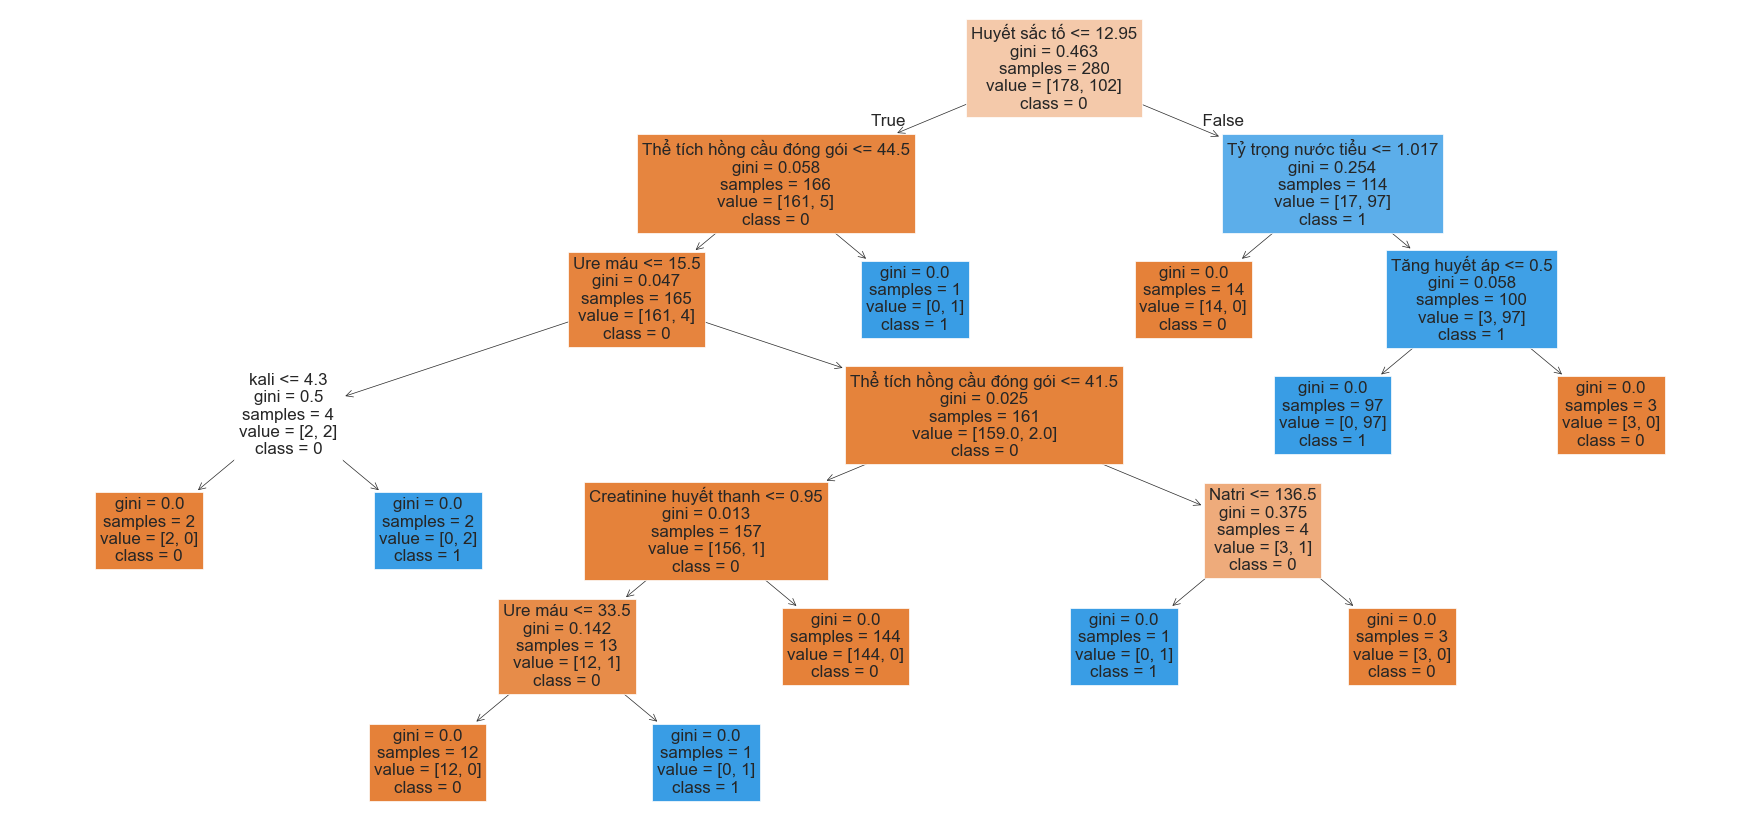

In [30]:
# Sơ đồ cây
from sklearn import tree
sns.set_style('white')
plt.figure(figsize=(20, 10))
tree.plot_tree(dtc, 
               feature_names=X.columns, 
               class_names=dtc.classes_.astype(str),
               filled=True)
plt.show()

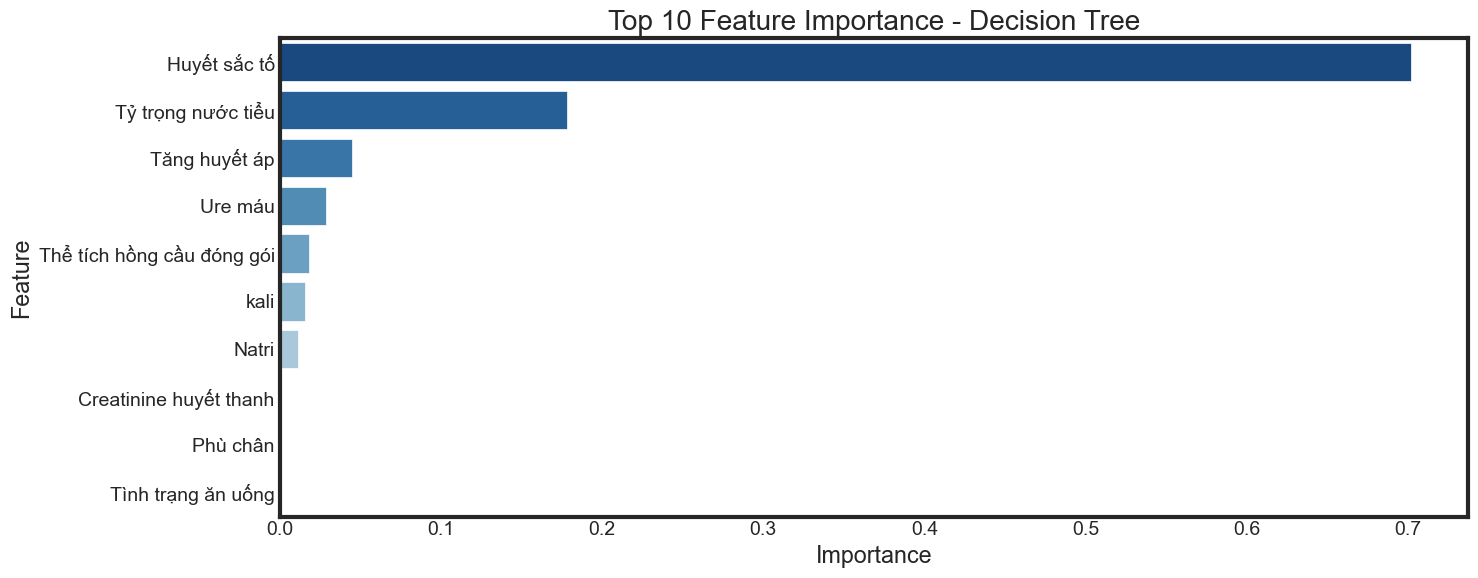

In [31]:
# Feature important
importances = dtc.feature_importances_

feature_names = X_train.columns

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})
fi_df = fi_df.sort_values(by="Importance", ascending=False)

TOP_K = 10
fi_top = fi_df.head(TOP_K)

plt.figure(figsize=(15, 6))
sns.barplot(
    data=fi_top,
    x="Importance",
    y="Feature",
    palette="Blues_r"
)

plt.title(f"Top {TOP_K} Feature Importance - Decision Tree")
plt.tight_layout()
plt.show()

In [32]:
# Randomforest
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=11,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=130
)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



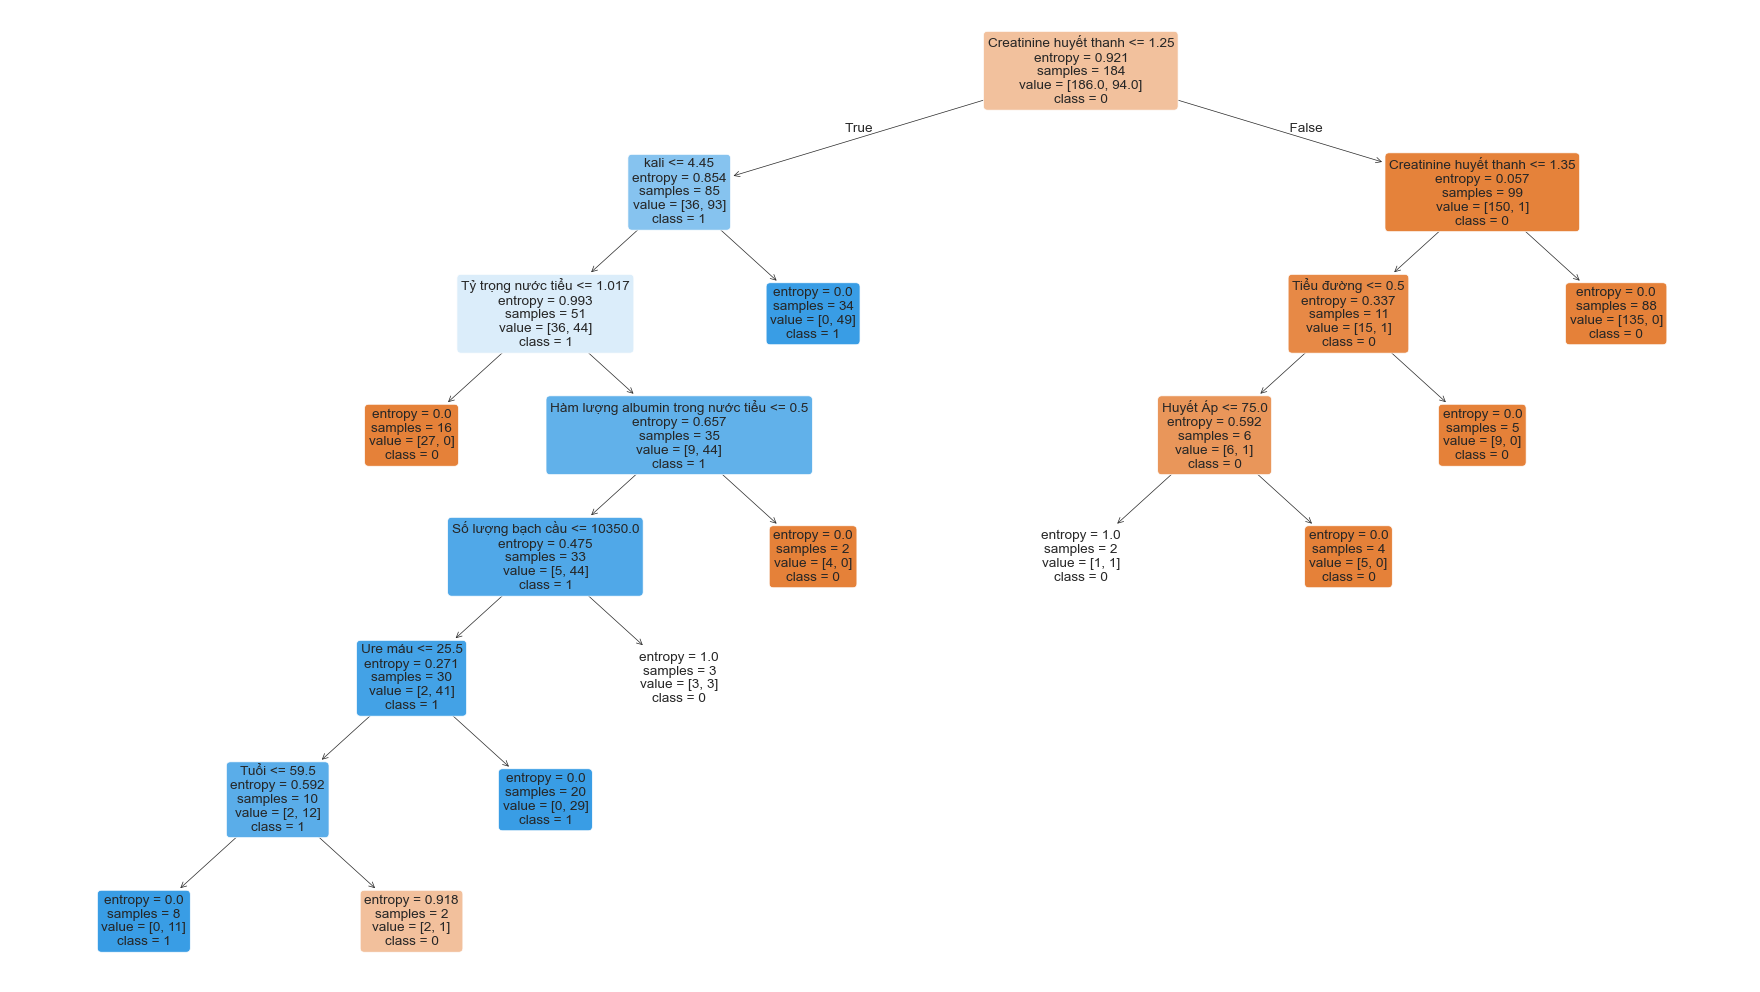

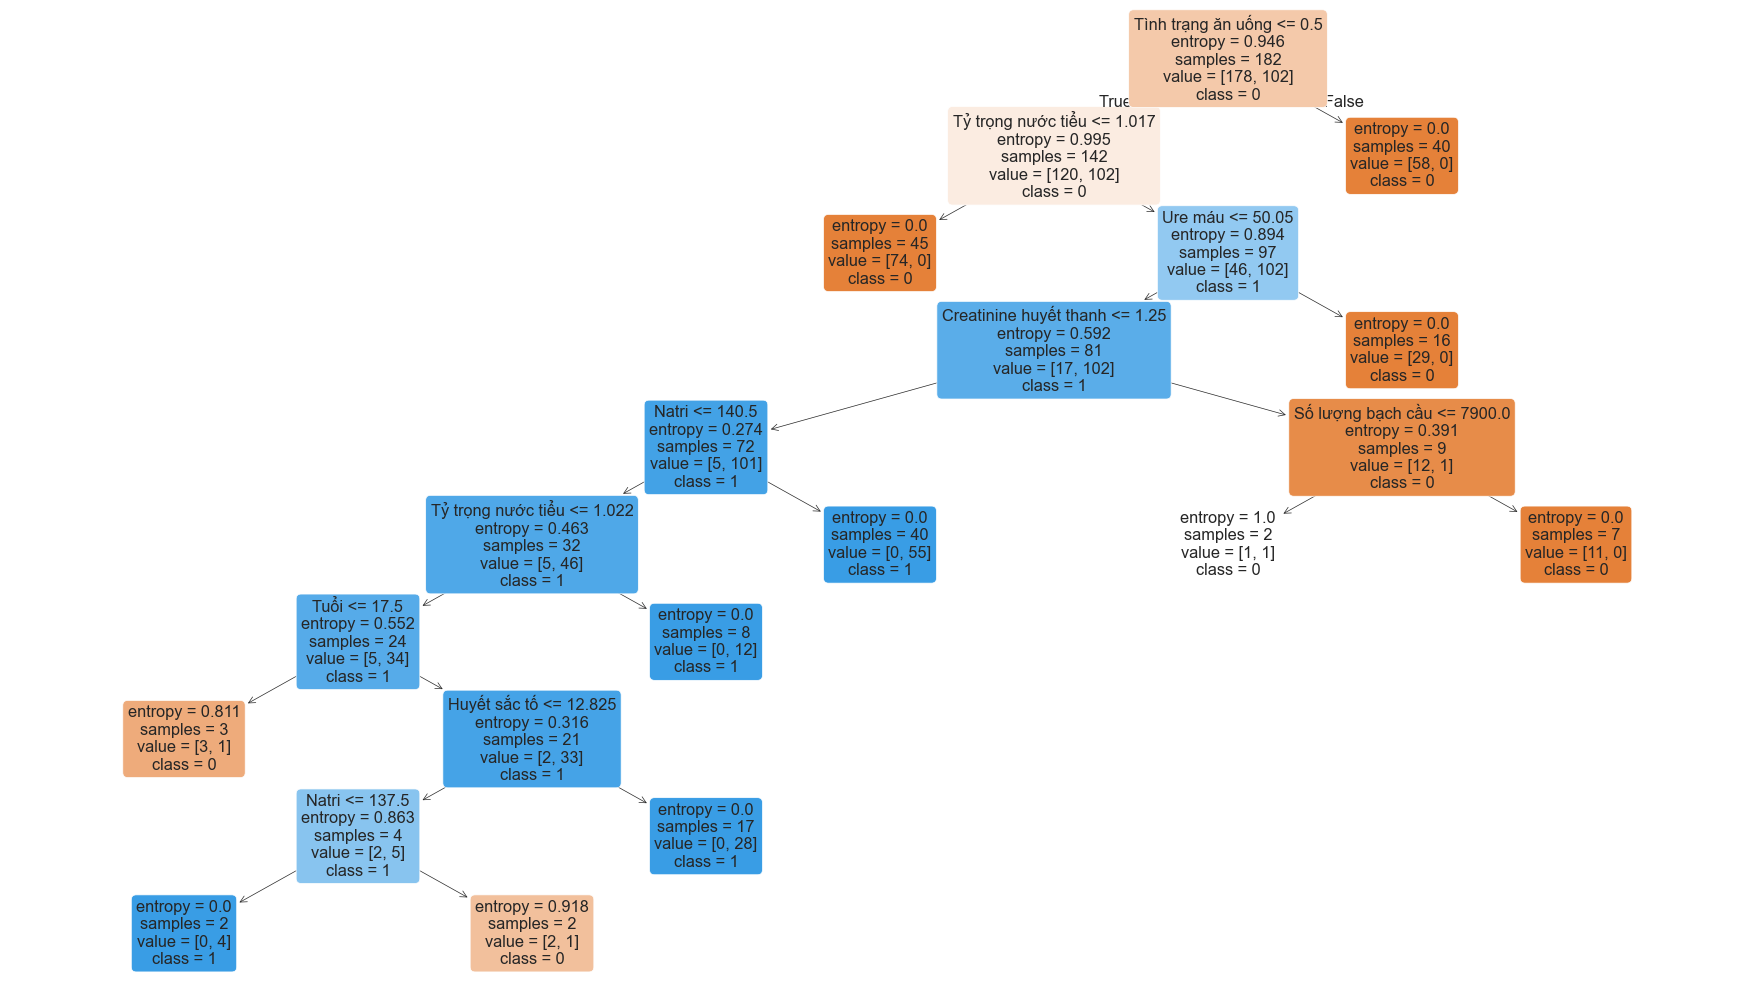

In [33]:
# Sơ đồ rừng
import random
from sklearn import tree

# lấy 5 cây ngẫu nhiên
random_trees = random.sample(range(len(rd_clf.estimators_)), 2)

for idx in random_trees:
    plt.figure(figsize=(20, 12))
    plt.title(f"Cây số {idx}")
    tree.plot_tree(
        rd_clf.estimators_[idx],
        feature_names=X_train.columns,
        class_names=[str(cls) for cls in rd_clf.classes_],
        filled=True,
        rounded=True
    )
    plt.show()


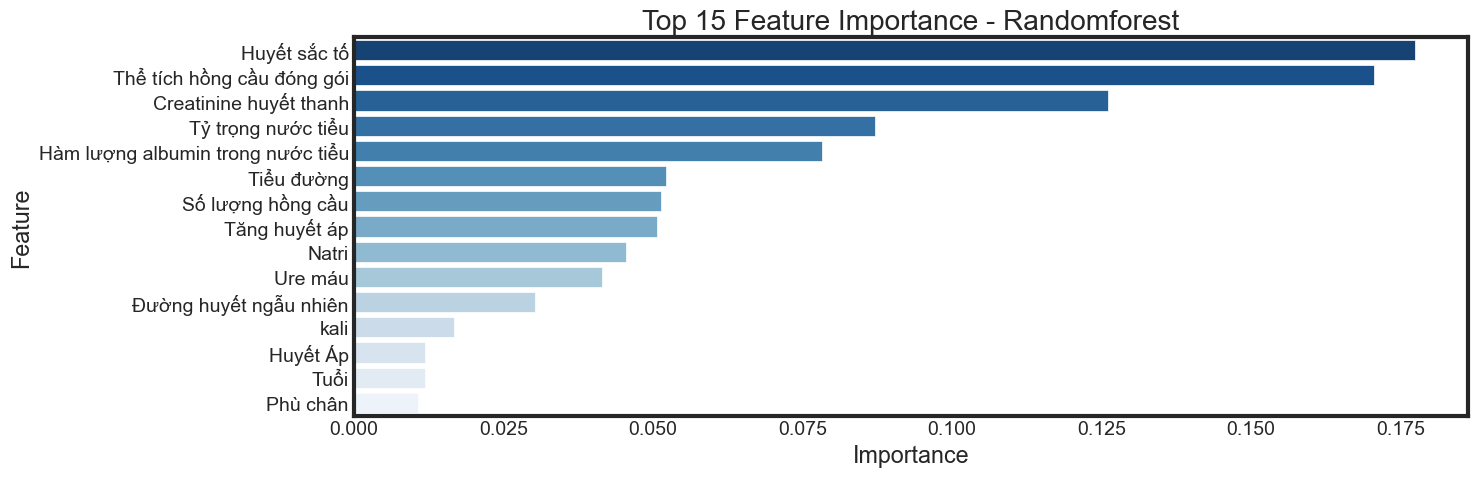

In [34]:
importances = rd_clf.feature_importances_

feature_names = X_train.columns

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})
fi_df = fi_df.sort_values(by="Importance", ascending=False)

TOP_K = 15
fi_top = fi_df.head(TOP_K)

plt.figure(figsize=(15, 5))
sns.barplot(
    data=fi_top,
    x="Importance",
    y="Feature",
    palette="Blues_r"
)

plt.title(f"Top {TOP_K} Feature Importance - Randomforest")
plt.tight_layout()
plt.show()

In [35]:
# Logistic 
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',
    max_iter=200
)

# Train model
log_clf.fit(X_train_scaled, y_train)


log_acc = accuracy_score(y_test, log_clf.predict(X_test_scaled))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, log_clf.predict(X_train_scaled))}")
print(f"Test Accuracy of Logistic Regression is {log_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, log_clf.predict(X_test_scaled))}\n")
print(f"Classification Report :- \n {classification_report(y_test, log_clf.predict(X_test_scaled))}")

Training Accuracy of Logistic Regression is 0.95
Test Accuracy of Logistic Regression is 0.9916666666666667 

Confusion Matrix :- 
[[71  1]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Feature Importance (Logistic Regression):
                              Feature  Coefficient  Importance
2                  Tỷ trọng nước tiểu     2.493484    2.493484
19                         Tiểu đường    -2.006342    2.006342
3   Hàm lượng albumin trong nước tiểu    -1.766247    1.766247
18                      Tăng huyết áp    -1.624239    1.624239
14                       Huyết sắc tố     1.473700    1.473700
21                 Tình trạng ăn uống    -1.439550    1.439550
15         Thể tích hồng cầu đóng gói     1.191714    1.191714
22                           Phù chân    -1.170060    1.170060
1                            Huyết Áp    -1.027058    1.027058
9              Đường huyết ngẫu nhiên    -0.878735    0.878735
23                          Thiếu máu    -0.832979    0.832979
4           Mức đường trong nước tiểu    -0.576803    0.576803
11             Creatinine huyết thanh    -0.555289    0.555289
17                  Số lượng hồng cầu     0.452926    0.452926
10           

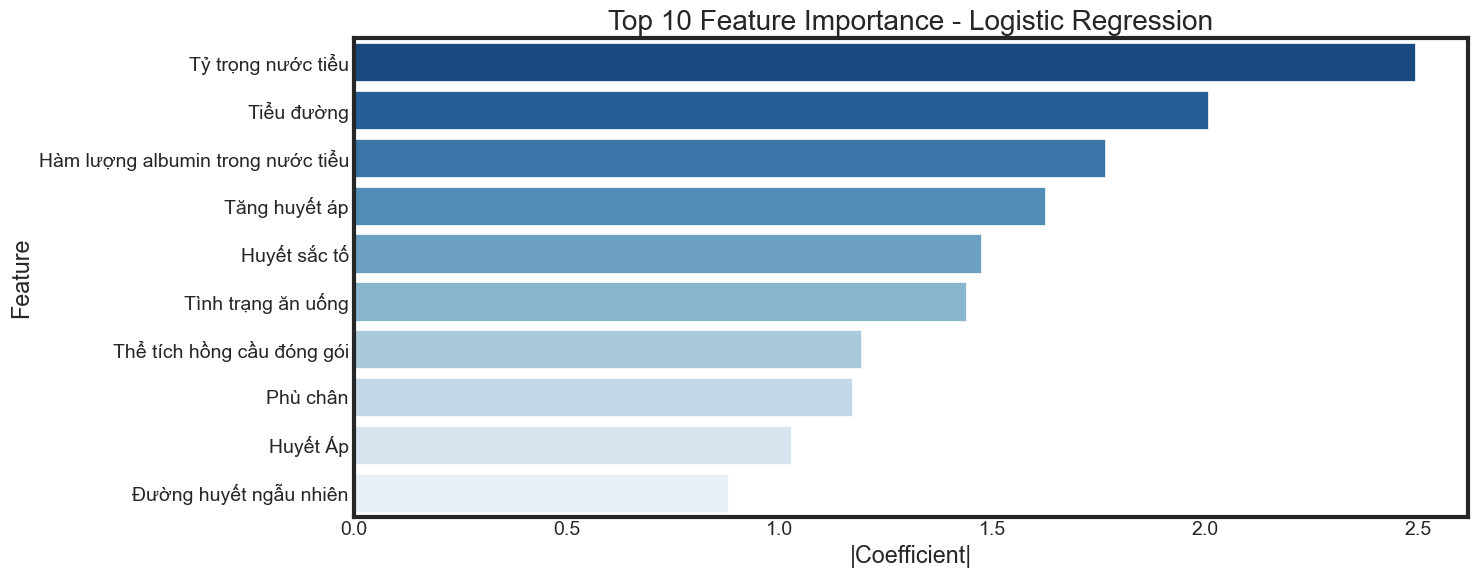

In [36]:
coefficients = log_clf.coef_[0]

feature_names = X_train.columns

fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Importance": np.abs(coefficients)
})

fi_df = fi_df.sort_values(by="Importance", ascending=False)

print("Feature Importance (Logistic Regression):")
print(fi_df)

TOP_K = 10
fi_top = fi_df.head(TOP_K)

plt.figure(figsize=(15, 6))
sns.barplot(
    data=fi_top,
    x="Importance",
    y="Feature",
    palette="Blues_r"
)

plt.xlabel("|Coefficient|")
plt.ylabel("Feature")
plt.title(f"Top {TOP_K} Feature Importance - Logistic Regression")
plt.tight_layout()
plt.show()


In [ ]:
X_new = pd.DataFrame([{
    'Tuổi': 23,
    'Huyết Áp': 75,
    'Tỷ trọng nước tiểu': 1.025,
    'Hàm lượng albumin trong nước tiểu': 0,
    'Mức đường trong nước tiểu': 0,
    'Tình trạng hồng cầu': 1,
    'Tình trạng bạch cầu mủ': 1,
    'Cụm bạch cầu mủ': 0,
    'Vi khuẩn trong nước tiểu': 1,
    'Đường huyết ngẫu nhiên': 180,
    'Ure máu': 50,
    'Creatinine huyết thanh': 5,
    'Natri': 130,
    'kali': 5.2,
    'Huyết sắc tố': 9.5,
    'Thể tích hồng cầu đóng gói': 30,
    'Số lượng bạch cầu': 9000,
    'Số lượng hồng cầu': 3.2,
    'Tăng huyết áp': 1,
    'Tiểu đường': 1,
    'Bệnh động mạch vành': 0,
    'Tình trạng ăn uống': 1,
    'Phù chân': 1,
    'Thiếu máu': 1
}])
X_new_scaled = X_new.copy()
X_new_scaled[cols_to_scale] = scaler.transform(X_new[cols_to_scale])
pred_class = log_clf.predict(X_new_scaled)[0]
pred_proba = log_clf.predict_proba(X_new_scaled)[0]

prob_ckd     = pred_proba[0]
prob_not_ckd = pred_proba[1]

print("KẾT QUẢ DỰ ĐOÁN")

if pred_class == 0:
    print("Bệnh nhân có nguy cơ mắc CKD")
    print(f"Độ tin cậy: {prob_ckd*100:.2f}%")
else:
    print("Bệnh nhân không mắc CKD")
    print(f"Độ tin cậy: {prob_not_ckd*100:.2f}%")

print("\nChi tiết xác suất")
print(f"P(CKD):     {prob_ckd:.4f}")
print(f"P(NOT CKD): {prob_not_ckd:.4f}")

KẾT QUẢ DỰ ĐOÁN
Bệnh nhân có nguy cơ mắc CKD
Độ tin cậy: 99.79%

Chi tiết xác suất
P(CKD):     0.9979
P(NOT CKD): 0.0021


In [38]:
cols_to_scale

['Tuổi',
 'Huyết Áp',
 'Tỷ trọng nước tiểu',
 'Đường huyết ngẫu nhiên',
 'Ure máu',
 'Creatinine huyết thanh',
 'Natri',
 'kali',
 'Huyết sắc tố',
 'Thể tích hồng cầu đóng gói',
 'Số lượng bạch cầu',
 'Số lượng hồng cầu']

In [39]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Logistic Regresstion'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc,log_acc]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,1.000000
3,Logistic Regresstion,0.991667
0,KNN,0.983333
1,Decision Tree Classifier,0.983333


In [40]:
models_no_scaling = {
    "Decision Tree": dtc,
    "Random Forest": rd_clf
}

models_scaled = {
    "Logistic Regression": log_clf,
    "KNN": knn
}

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd


# --- 1. Nhóm mô hình KHÔNG cần chuẩn hóa ---
models_no_scaling = {
    "Decision Tree": dtc,
    "Random Forest": rd_clf
}

# --- 2. Nhóm mô hình CÓ chuẩn hóa ---
models_scaled = {
    "Logistic Regression": log_clf,
    "KNN": knn
}


def evaluate_models(model_dict, X_test_input, y_test):
    results = []
    
    for name, model in model_dict.items():
        y_pred = model.predict(X_test_input)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # AUC (nếu hỗ trợ)
        try:
            y_prob = model.predict_proba(X_test_input)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
        except:
            auc = None

        results.append([name, accuracy, precision, recall, f1, auc])

    return pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"])



# --- 3. ĐÁNH GIÁ MÔ HÌNH KHÔNG CHUẨN HÓA ---
df_no_scaling = evaluate_models(models_no_scaling, X_test, y_test)

# --- 4. ĐÁNH GIÁ MÔ HÌNH ĐƯỢC CHUẨN HÓA ---
df_scaled = evaluate_models(models_scaled, X_test_scaled, y_test)


# --- 5. In kết quả ---
print("KẾT QUẢ CHO MÔ HÌNH KHÔNG CẦN CHUẨN HÓA:")
display(df_no_scaling)

print("KẾT QUẢ CHO MÔ HÌNH CÓ CHUẨN HÓA:")
display(df_scaled)

KẾT QUẢ CHO MÔ HÌNH KHÔNG CẦN CHUẨN HÓA:


,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Decision Tree,0.983333,0.979167,0.979167,0.979167,0.982639
1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000


KẾT QUẢ CHO MÔ HÌNH CÓ CHUẨN HÓA:


,Model,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.991667,0.979592,1.0,0.989691,1.000000
1,KNN,0.983333,0.960000,1.0,0.979592,0.999855


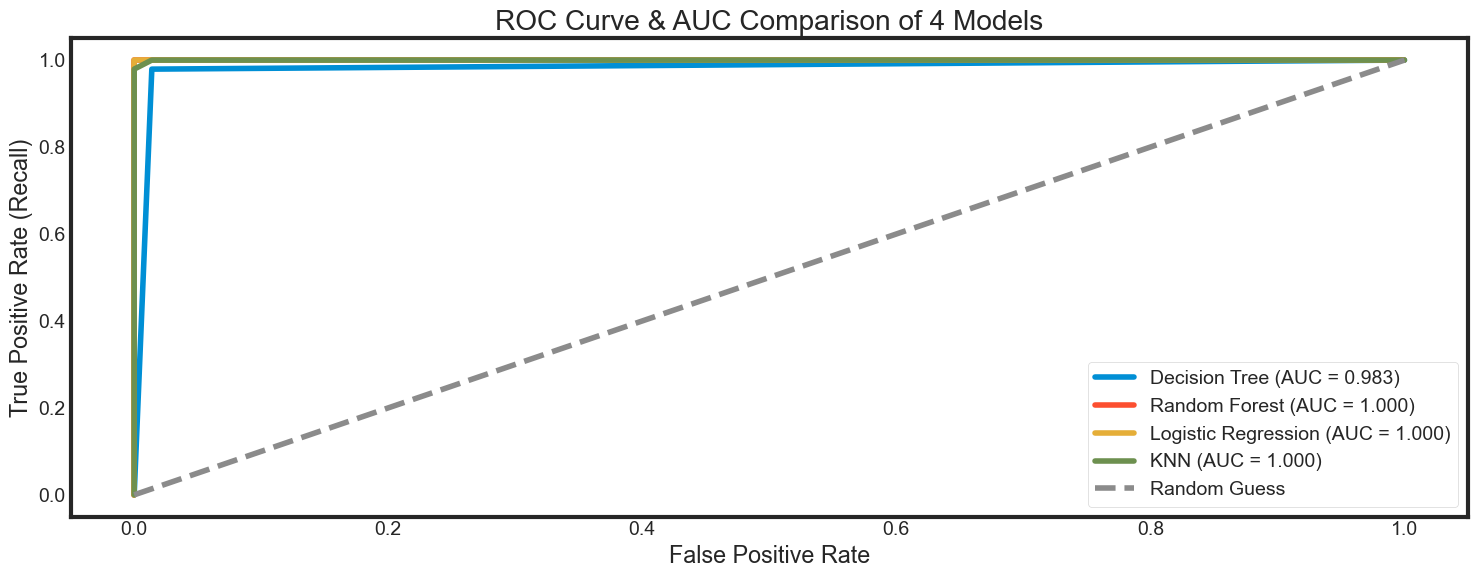

In [42]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(15, 6))


# Decision Tree
y_prob_dtc = dtc.predict_proba(X_test)[:, 1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_prob_dtc)
auc_dtc = auc(fpr_dtc, tpr_dtc)
plt.plot(fpr_dtc, tpr_dtc, label=f"Decision Tree (AUC = {auc_dtc:.3f})")

# Random Forest

y_prob_rf = rd_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")

# Logistic Regression
y_prob_log = log_clf.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")

# KNN
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.3f})")

# Random baseline

plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve & AUC Comparison of 4 Models")
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
# Shuffled Labels trên logistic ( Các mô hình khác tương tự nhau )
y_train_shuffled = np.random.permutation(y_train)
from sklearn.linear_model import LogisticRegression

log_shuffle = LogisticRegression(max_iter=1000)
log_shuffle.fit(X_train_scaled, y_train_shuffled)
y_train_pred = log_shuffle.predict(X_train_scaled)
y_test_pred  = log_shuffle.predict(X_test_scaled)
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train_shuffled, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy (shuffled): {train_acc:.4f}")
print(f"Test Accuracy (shuffled):     {test_acc:.4f}")
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix (Test, shuffled):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test, shuffled):")
print(classification_report(y_test, y_test_pred))
from sklearn.metrics import roc_auc_score

# Lấy xác suất dự đoán
y_test_proba = log_shuffle.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_test_proba)
print(f"ROC-AUC (shuffled): {auc:.4f}")

Training Accuracy (shuffled): 0.6607
Test Accuracy (shuffled):     0.5250
Confusion Matrix (Test, shuffled):
[[63  9]
 [48  0]]

Classification Report (Test, shuffled):
              precision    recall  f1-score   support

           0       0.57      0.88      0.69        72
           1       0.00      0.00      0.00        48

    accuracy                           0.53       120
   macro avg       0.28      0.44      0.34       120
weighted avg       0.34      0.53      0.41       120

ROC-AUC (shuffled): 0.7477


In [44]:
# Thử lại với 50 lần
import numpy as np
from sklearn.metrics import roc_auc_score

aucs = []
accs = []

for _ in range(50):
    y_shuf = np.random.permutation(y_train)
    log_shuffle.fit(X_train_scaled, y_shuf)

    y_test_proba = log_shuffle.predict_proba(X_test_scaled)[:, 1]
    y_test_pred  = log_shuffle.predict(X_test_scaled)

    aucs.append(roc_auc_score(y_test, y_test_proba))
    accs.append(accuracy_score(y_test, y_test_pred))

print("Mean shuffled AUC:", np.mean(aucs))
print("Std shuffled AUC:", np.std(aucs))
print("Mean shuffled Accuracy:", np.mean(accs))

Mean shuffled AUC: 0.4865104166666667
Std shuffled AUC: 0.1812928054387476
Mean shuffled Accuracy: 0.5070000000000001


In [45]:
import os

# Đang chạy trong demo/
NOTEBOOK_DIR = os.getcwd()

# Quay về root BTL-MLAI
ROOT_DIR = os.path.abspath(os.path.join(NOTEBOOK_DIR, ".."))

# Thư mục model/
MODEL_DIR = os.path.join(ROOT_DIR, "model2xacnhan")

os.makedirs(MODEL_DIR, exist_ok=True)

print("MODEL DIR:", MODEL_DIR)

MODEL DIR: d:\BTL-MLAIDM\model2xacnhan


In [46]:
import joblib

joblib.dump(scaler, os.path.join(MODEL_DIR, "scaler2xacnhan.pkl"))

joblib.dump(cols_to_scale, os.path.join(MODEL_DIR, "cols_to_scale2xacnhan.pkl"))

joblib.dump(log_clf, os.path.join(MODEL_DIR, "model2xacnhan.pkl"))

joblib.dump(encoders, os.path.join(MODEL_DIR, "encoders2xacnhan.pkl"))

print("✅ Đã lưu scaler, cols_to_scale, model, encoders vào thư mục model/")

✅ Đã lưu scaler, cols_to_scale, model, encoders vào thư mục model/


In [47]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
num_cols = ['Tuổi', 'Huyết Áp', 'Tỷ trọng nước tiểu',
       'Hàm lượng albumin trong nước tiểu', 'Mức đường trong nước tiểu',
       'Đường huyết ngẫu nhiên', 'Ure máu', 'Creatinine huyết thanh', 'Natri',
       'kali', 'Huyết sắc tố', 'Thể tích hồng cầu đóng gói',
       'Số lượng bạch cầu', 'Số lượng hồng cầu']

cat_cols = ['Tình trạng hồng cầu', 'Tình trạng bạch cầu mủ', 'Cụm bạch cầu mủ',
       'Vi khuẩn trong nước tiểu', 'Tăng huyết áp', 'Tiểu đường',
       'Bệnh động mạch vành', 'Tình trạng ăn uống', 'Phù chân', 'Thiếu máu',
       ]

numeric_scaled = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="if_binary", handle_unknown="ignore"))
])

preprocess_scaled = ColumnTransformer([
    ("num", numeric_scaled, num_cols),
    ("cat", categorical, cat_cols)
])

preprocess_tree = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", categorical, cat_cols)
])
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models = {
    "Logistic": Pipeline([
        ("preprocess", preprocess_scaled),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "KNN": Pipeline([
        ("preprocess", preprocess_scaled),
        ("model", KNeighborsClassifier(n_neighbors=5, weights="distance"))
    ]),

    "Decision Tree": Pipeline([
        ("preprocess", preprocess_tree),
        ("model", DecisionTreeClassifier(
            max_depth=4,
            min_samples_leaf=10,
            random_state=42
        ))
    ]),

    "Random Forest": Pipeline([
        ("preprocess", preprocess_tree),
        ("model", RandomForestClassifier(
            n_estimators=200,
            max_depth=5,
            min_samples_leaf=10,
            random_state=42
        ))
    ])
}
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
for model_name, pipeline in models.items():
    print(f"{model_name.upper()}")

    train_accs, val_accs, aucs = [], [], []
    fold = 1

    for train_idx, val_idx in cv.split(X_train, y_train):
        print(f"Fold {fold}")

        X_tr = X_train.iloc[train_idx]
        X_val = X_train.iloc[val_idx]
        y_tr = y_train.iloc[train_idx]
        y_val = y_train.iloc[val_idx]

        # Train
        pipeline.fit(X_tr, y_tr)

        # Predict
        y_tr_pred = pipeline.predict(X_tr)
        y_val_pred = pipeline.predict(X_val)
        y_val_proba = pipeline.predict_proba(X_val)[:, 1]

        # Metrics
        train_acc = accuracy_score(y_tr, y_tr_pred)
        val_acc = accuracy_score(y_val, y_val_pred)
        auc = roc_auc_score(y_val, y_val_proba)

        train_accs.append(train_acc)
        val_accs.append(val_acc)
        aucs.append(auc)

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Validation AUC: {auc:.4f}")
        print("Confusion Matrix (Validation):")
        print(confusion_matrix(y_val, y_val_pred))
        print()

        fold += 1

    # Summary
    print(f"{model_name} K-FOLD SUMMARY")
    print(f"Mean Train Accuracy: {np.mean(train_accs):.4f}")
    print(f"Mean Validation Accuracy: {np.mean(val_accs):.4f}")
    print(f"Mean AUC: {np.mean(aucs):.4f}")
    print(f"Std AUC: {np.std(aucs):.4f}")
best_model = models["Logistic"]   # ví dụ
best_model.fit(X_train, y_train)

LOGISTIC
Fold 1
Train Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation AUC: 1.0000
Confusion Matrix (Validation):
[[36  0]
 [ 0 20]]

Fold 2
Train Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation AUC: 1.0000
Confusion Matrix (Validation):
[[36  0]
 [ 0 20]]

Fold 3
Train Accuracy: 0.9955
Validation Accuracy: 0.9821
Validation AUC: 1.0000
Confusion Matrix (Validation):
[[36  0]
 [ 1 19]]

Fold 4
Train Accuracy: 1.0000
Validation Accuracy: 1.0000
Validation AUC: 1.0000
Confusion Matrix (Validation):
[[35  0]
 [ 0 21]]

Fold 5
Train Accuracy: 1.0000
Validation Accuracy: 0.9821
Validation AUC: 1.0000
Confusion Matrix (Validation):
[[34  1]
 [ 0 21]]

Logistic K-FOLD SUMMARY
Mean Train Accuracy: 0.9991
Mean Validation Accuracy: 0.9929
Mean AUC: 1.0000
Std AUC: 0.0000
KNN
Fold 1
Train Accuracy: 1.0000
Validation Accuracy: 0.9464
Validation AUC: 1.0000
Confusion Matrix (Validation):
[[33  3]
 [ 0 20]]

Fold 2
Train Accuracy: 1.0000
Validation Accuracy: 0.9643
Validation AUC: 1.0

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


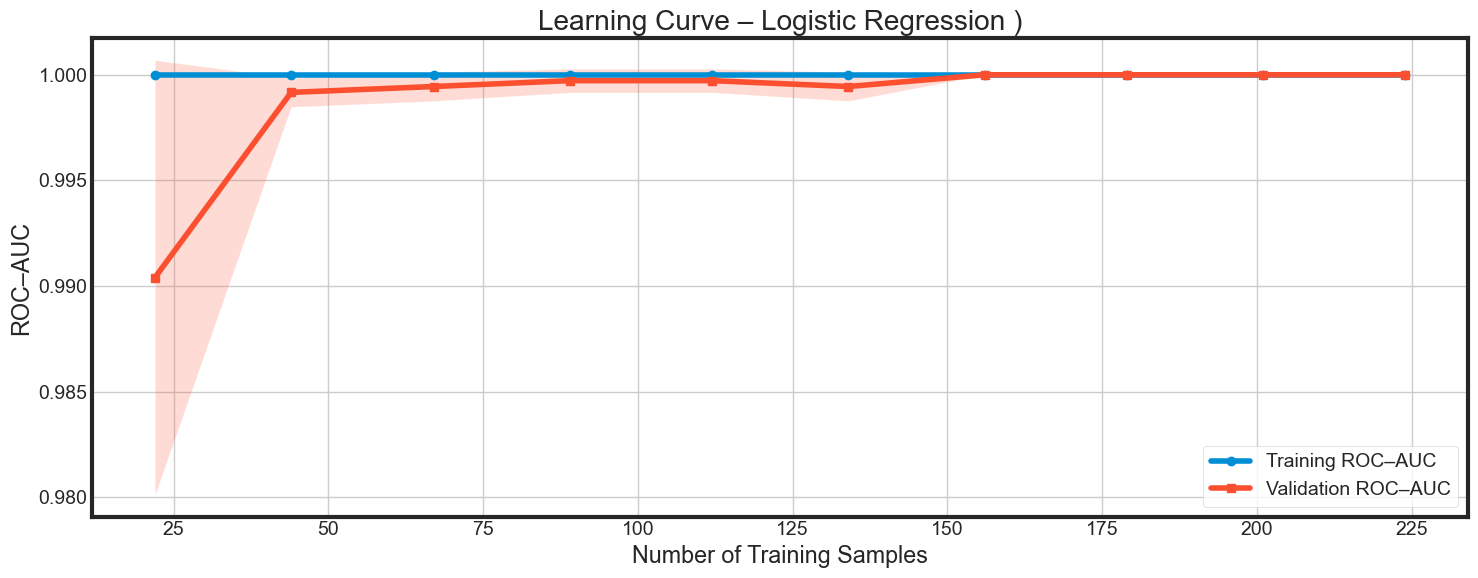

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold
sns.set_style('white')
pipe_logistic = models["Logistic"]
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)
train_sizes, train_scores, val_scores = learning_curve(
    estimator=pipe_logistic,
    X=X_train,
    y=y_train,
    cv=cv,
    scoring="roc_auc",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

val_mean = np.mean(val_scores, axis=1)
val_std  = np.std(val_scores, axis=1)
plt.figure(figsize=(15, 6))

plt.plot(train_sizes, train_mean, marker='o', label="Training ROC–AUC")
plt.plot(train_sizes, val_mean, marker='s', label="Validation ROC–AUC")

plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.2
)

plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.2
)

plt.xlabel("Number of Training Samples")
plt.ylabel("ROC–AUC")
plt.title("Learning Curve – Logistic Regression )")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()